### Решение задачи при помощи полносвязной сети.

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
EPOCHS = 9
BATCH_SIZE = 200
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/9
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8636 - acc: 0.7148
Epoch 2/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.5160 - acc: 0.8252
Epoch 3/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4617 - acc: 0.8415
Epoch 4/9
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4362 - acc: 0.8485
Epoch 5/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4179 - acc: 0.8549
Epoch 6/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4078 - acc: 0.8577
Epoch 7/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3959 - acc: 0.8611
Epoch 8/9
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3896 - acc: 0.8637
Epoch 9/9
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3800 - acc: 0.8667


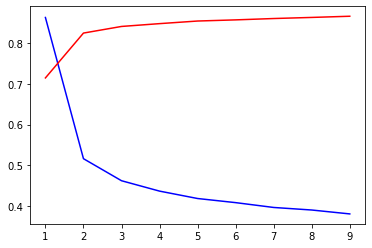

In [7]:
history_dict = history.history
epochs = range(1, EPOCHS + 1)
loss_values = history_dict['loss']
acc_values = history_dict['acc']
plt.plot(epochs, loss_values, 'b')
plt.plot(epochs, acc_values, 'r');

### Решение задачи при помощи сверточной сети.

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                36928     
__________

In [14]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
   loss='categorical_crossentropy',
   metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 41s 679us/sample - loss: 0.5392 - acc: 0.8009
Epoch 2/5
60000/60000 [==============================] - 40s 673us/sample - loss: 0.3291 - acc: 0.8792
Epoch 3/5
60000/60000 [==============================] - 40s 672us/sample - loss: 0.2782 - acc: 0.8993
Epoch 4/5
60000/60000 [==============================] - 40s 675us/sample - loss: 0.2458 - acc: 0.9092
Epoch 5/5
60000/60000 [==============================] - 40s 674us/sample - loss: 0.2238 - acc: 0.9185


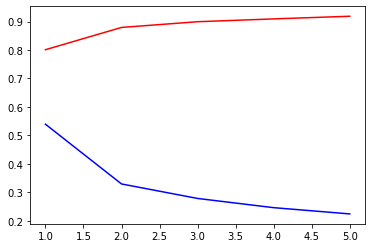

In [29]:
history = Out[14]
history_dict = history.history
epochs = range(1, 6)
loss_values = history_dict['loss']
acc_values = history_dict['acc']
plt.plot(epochs, loss_values, 'b')
plt.plot(epochs, acc_values, 'r');